In [1]:
import os
from pathlib import Path
import pickle
import numpy as np
import pandas as pd

In [2]:
def load_data(filename):
    with open(filename, 'rb') as file:
        return pickle.load(file)

In [3]:
data_root = r"C:/Users/hayashi/doutorado/mac6958--dados-redes/webrtc"
processed_file = Path(data_root, 'data/processed/facial-1001.pkl')

In [4]:
data = load_data(processed_file)

In [5]:
len(data)

300

In [6]:
data[0]['features'].shape

(3676, 323)

In [7]:
# prepare the dataset


In [8]:
X = np.concatenate([d['features'] for d in data], axis=0)

In [9]:
Y = [np.tile(
        np.array([[d['delay'], d['jitter'], d['packet_loss_rate']]]),
        (d['features'].shape[0], 1)
      ) for d in data]

In [10]:
Y = np.concatenate(Y, axis=0)

In [11]:
Y.shape

(1049842, 3)

In [12]:
np.concatenate(Y, axis=0)

array([1000,  500,   15, ...,  500,  500,   15])

In [13]:
delay_values = {d['delay'] for d in data}
delay_values

{0, 500, 1000}

In [14]:
jitter_values = {d['jitter'] for d in data}
jitter_values

{0, 500}

In [15]:
packet_loss_values = {d['packet_loss_rate'] for d in data}
packet_loss_values

{0, 15, 30}

In [16]:
max_delay = max(delay_values)
max_delay

1000

In [17]:
{d/max_delay for d in delay_values}

{0.0, 0.5, 1.0}

In [18]:
max_jitter = max(jitter_values)
max_jitter

500

In [19]:
max_package_loss = max(packet_loss_values)
max_package_loss

30

In [20]:
newY= Y / [max_delay, max_jitter, max_package_loss]

In [21]:
set(d[2] for d in newY)

{0.0, 0.5, 1.0}

In [22]:
Y = newY

In [23]:
X.shape, Y.shape

((1049842, 323), (1049842, 3))

In [24]:
import numpy as np
import tensorflow as tf

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [27]:
# Assuming X and Y are already defined as numpy arrays
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [28]:
import matplotlib.pyplot as plt

In [29]:
from tensorflow.keras.layers import Dropout

In [30]:
model = Sequential([
    Dense(128, input_shape=(323,), activation='relu'),
    BatchNormalization(),
    Dropout(0.3),  # Dropout at 30%
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),  # Dropout at 20%
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),  # Dropout at 10%
    Dense(3, activation='sigmoid')
])

C:\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mean_squared_error'])

history = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/50
23622/23622 ━━━━━━━━━━━━━━━━━━━━ 35s 1ms/step - loss: 0.1830 - mean_squared_error: 0.1830 - val_loss: 0.1839 - val_mean_squared_error: 0.1839
Epoch 2/50
23622/23622 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - loss: 0.1772 - mean_squared_error: 0.1772 - val_loss: 0.1775 - val_mean_squared_error: 0.1775
Epoch 3/50
23622/23622 ━━━━━━━━━━━━━━━━━━━━ 35s 1ms/step - loss: 0.1762 - mean_squared_error: 0.1762 - val_loss: 0.1724 - val_mean_squared_error: 0.1724
Epoch 4/50
23622/23622 ━━━━━━━━━━━━━━━━━━━━ 35s 1ms/step - loss: 0.1768 - mean_squared_error: 0.1768 - val_loss: 0.1762 - val_mean_squared_error: 0.1762
Epoch 5/50
23622/23622 ━━━━━━━━━━━━━━━━━━━━ 35s 1ms/step - loss: 0.1766 - mean_squared_error: 0.1766 - val_loss: 0.1722 - val_mean_squared_error: 0.1722
Epoch 6/50
23622/23622 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - loss: 0.1761 - mean_squared_error: 0.1761 - val_loss: 0.1706 - val_mean_squared_error: 0.1706
Epoch 7/50
23622/23622 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - loss: 0.1762 - mean_squ

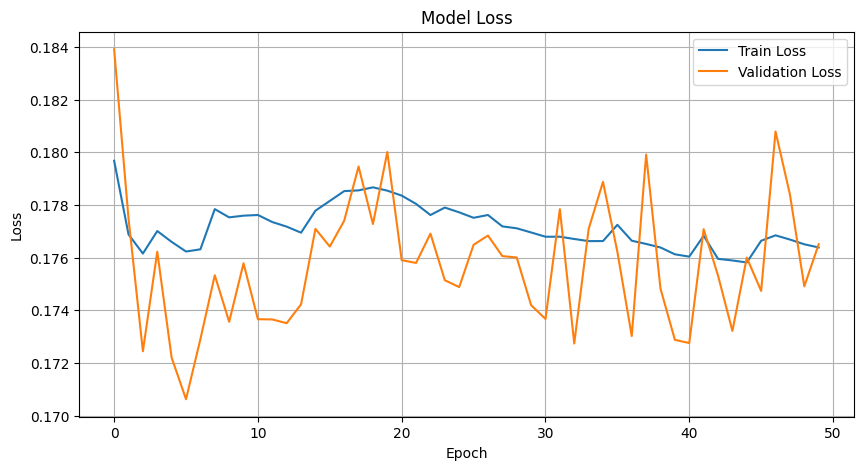

In [33]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()